<a href="https://colab.research.google.com/github/rakeshindukuri/projects/blob/main/Cancer_pred_NN/cancer_pred_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Neural Network for Cancer Prediction

In [66]:
# IMPORTING
#handling
import pandas as pd
import numpy as np
#vis
import matplotlib.pyplot as plt
import seaborn as sns
#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
#classification
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [67]:
# Read data

data=pd.read_csv('cancer_gene_expression.csv')
data.shape

(801, 8001)

In [68]:
data.columns[0:3]

Index(['gene_1', 'gene_2', 'gene_3'], dtype='object')

In [69]:
data.columns[-1]

'Cancer_Type'

In [70]:
data.isnull().sum()

gene_1         0
gene_2         0
gene_3         0
gene_4         0
gene_5         0
              ..
gene_7997      0
gene_7998      0
gene_7999      0
gene_8000      0
Cancer_Type    0
Length: 8001, dtype: int64

In [71]:
# Missing values
freedata=data.isnull().sum()
g=[i for i in freedata if i>0]

print('Cols with missing values:%d'%len(g))

Cols with missing values:0


In [72]:
# Checking for types of cancer:
data['Cancer_Type'].value_counts()

BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: Cancer_Type, dtype: int64

In [73]:
# DATA PREPROCESSING

X=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [74]:
# Encoding labels

le=LabelEncoder()
le.fit(y)
y=le.transform(y)
labels=le.classes_
classes=np.unique(y)
nclasses=np.unique(y).shape[0]

In [75]:
# Normalization: to avoid bias
# scale data between 0 and 1

mms=MinMaxScaler()
X=mms.fit_transform(X)

In [76]:
# Data splitting

# Train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Training and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [77]:
# Building Neural Network

model = Sequential()
model.add(Dense(42, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(22, activation='relu'))
model.add(Dense(nclasses, activation='softmax'))

# Optimizer
opt_adm = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=opt_adm, metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [78]:
# Fit model to train data

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=200, verbose=1)

Epoch 1/200
16/16 [==============================] - 1s 27ms/step - loss: 1.5467 - sparse_categorical_accuracy: 0.3555 - val_loss: 1.3534 - val_sparse_categorical_accuracy: 0.4062
Epoch 2/200
16/16 [==============================] - 0s 15ms/step - loss: 1.3181 - sparse_categorical_accuracy: 0.4434 - val_loss: 1.3099 - val_sparse_categorical_accuracy: 0.4141
Epoch 3/200
16/16 [==============================] - 0s 14ms/step - loss: 1.0819 - sparse_categorical_accuracy: 0.6738 - val_loss: 0.8945 - val_sparse_categorical_accuracy: 0.5781
Epoch 4/200
16/16 [==============================] - 0s 14ms/step - loss: 0.8255 - sparse_categorical_accuracy: 0.7695 - val_loss: 0.7755 - val_sparse_categorical_accuracy: 0.7812
Epoch 5/200
16/16 [==============================] - 0s 15ms/step - loss: 0.6310 - sparse_categorical_accuracy: 0.8770 - val_loss: 0.5379 - val_sparse_categorical_accuracy: 0.8984
Epoch 6/200
16/16 [==============================] - 0s 16ms/step - loss: 0.4528 - sparse_categorica

In [79]:
predictions = model.predict(X_test)
_, accuracy = model.evaluate(X_test, y_test, verbose=0)

6/6 [==============================] - 0s 3ms/step


In [88]:
# preds for random 20 samples:
import random
random_indices = random.sample(range(len(y_test)), 10)
for index in random_indices:
  print(f"Predicted: {np.argmax(predictions[index])}, actual:{y_test[index]}")

Predicted: 0, actual:0
Predicted: 2, actual:2
Predicted: 0, actual:0
Predicted: 0, actual:0
Predicted: 0, actual:0
Predicted: 0, actual:0
Predicted: 3, actual:3
Predicted: 0, actual:0
Predicted: 0, actual:0
Predicted: 4, actual:4


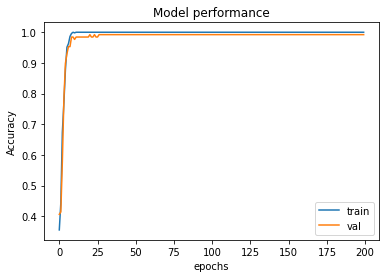

In [81]:
from keras.api._v2.keras.metrics import sparse_categorical_accuracy
# Summzrize history for accuracy:

plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model performance')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['train','val'], loc='lower right')
plt.show()

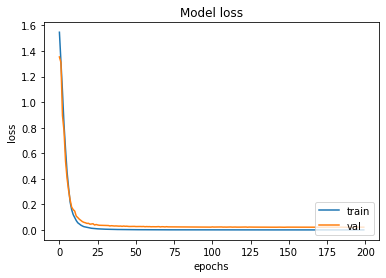

In [82]:
# Summzrize history for loss:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','val'], loc='lower right')
plt.show()